# Advanced Statistical Inference
## Kmeans

# 1 Aims
- To implement K-means and use it to cluster some data.

## 1.1 Kmeans data
- Download kmeans data


In [1]:
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('kmeansdata.txt') as f:
    points = np.loadtxt(f)

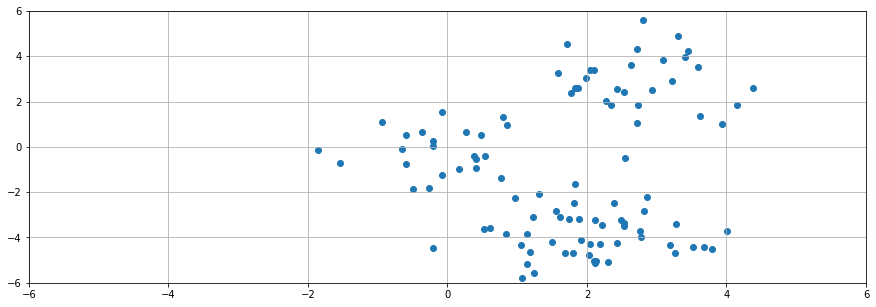

In [3]:
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.scatter(points[:,0],points[:,1])
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.grid()
plt.show()

## 2. Implement the K-means algorithm covered in the lecture (not the kernelised version).

In [4]:
def euclidean_distance(a, b):
    c = a - b
    return np.sqrt(c.T.dot(c))

In [5]:
def find_closest_centroid(datapoint, centroids):
    return np.argmin([euclidean_distance(datapoint, x) for x in centroids])

In [6]:
np.random.seed(22324)

# randomize initial centroids
def randomize_centroids(data, k):
    random_indices = np.arange(len(data))
    np.random.shuffle(random_indices)
    random_indices = random_indices[:k]
    return data[random_indices]

assert(len(
    randomize_centroids(
        np.array([ 
            np.array([2,1,2]), 
            np.array([1,2,1]), 
            np.array([3,1,2]) 
             ]), 
        2)) == 2), "Wrong function"

In [8]:
# return True if clusters have converged , otherwise, return False  
def check_converge(centroids, old_centroids, num_iterations, threshold=0, MAX_ITERATIONS = 20):
    # if it reaches an iteration budget

    if num_iterations > MAX_ITERATIONS:
        return True
    # check if the centroids don't move (or very slightly)
    if np.linalg.norm(centroids - old_centroids) <= threshold:
        return True
    return False

In [9]:
def update_centroids(centroids, clusters):
    clusters = np.array(clusters)
    new_centroids = np.ndarray(centroids.shape)
    for i, cluster in enumerate(clusters):
        new_centroids[i] = np.mean(cluster,axis=0)
    return new_centroids

In [10]:
# data : set of data points
# k : number of clusters
# centroids: initial list of centroids
import copy
def kmeans(data, k=2, centroids=None,MAX_ITERATIONS=20):
    
    data = np.array(data)
    # randomize the centroids if they are not given
    if not centroids:
        centroids = randomize_centroids(data, k)

    old_centroids = centroids[:]

    iterations = 0
    while True:
        #print('iteration %d' % iterations)
        iterations += 1
        
        # init empty clusters
        clusters = [[] for i in range(k)]

        # assign each data point to the closest centroid
        for datapoint in data:
            # find the closest center of each data point
            centroid_idx = find_closest_centroid(datapoint, centroids)
            
            # assign datapoint to the closest cluster
            clusters[centroid_idx].append(datapoint)
        
        # keep the current position of centroids before changing them
        old_centroids = centroids
        # update centroids
        centroids = update_centroids(centroids, clusters)
        if len(centroids) < k:
            centroids_to_find = k - len(centroids)
            new_centroids = randomize_centroids(data, centroids_to_find)
            centroids = centroids.append(*new_centroids)
        # if the stop criteria are met, stop the algorithm
        if check_converge(centroids, old_centroids, iterations,MAX_ITERATIONS=MAX_ITERATIONS):
            break
    print("number of iterations: %d" % iterations)
    return centroids

In [11]:
centroids = kmeans(points,3)

number of iterations: 5


In [12]:
clusters = {}
for i in range(len(centroids)):
    clusters[i] = []
for point in points:
    cluster = find_closest_centroid(point,centroids)
    clusters[cluster].append(point)

In [23]:
def show_cluster(points, k):
    plt.figure(figsize=(15,5))
    ax = plt.gca()
    centroids = kmeans(points,k)
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for point in points:
        cluster = find_closest_centroid(point,centroids)
        clusters[cluster].append(point)
    for cluster in clusters.values():
        new_cluster = np.array(cluster)
        ax.scatter(new_cluster[:,0],new_cluster[:,1])
    plt.grid()
    plt.show()

## 3. Run your algorithm for K = 2, 3, 4, 5 and, in each case, plot the data using a different symbol for each cluster. Show the results

number of iterations: 8


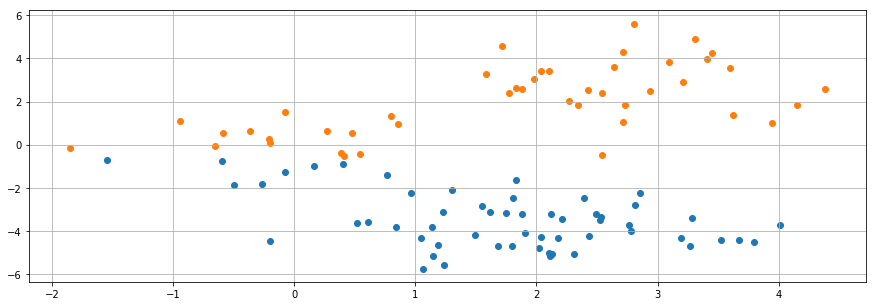

In [24]:
show_cluster(points,2)

number of iterations: 9


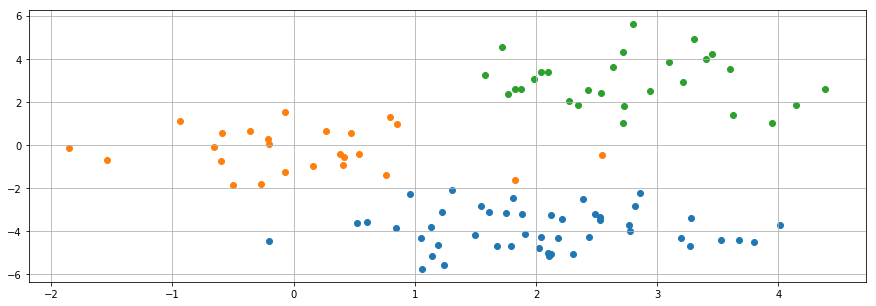

In [25]:
show_cluster(points,3)

number of iterations: 4


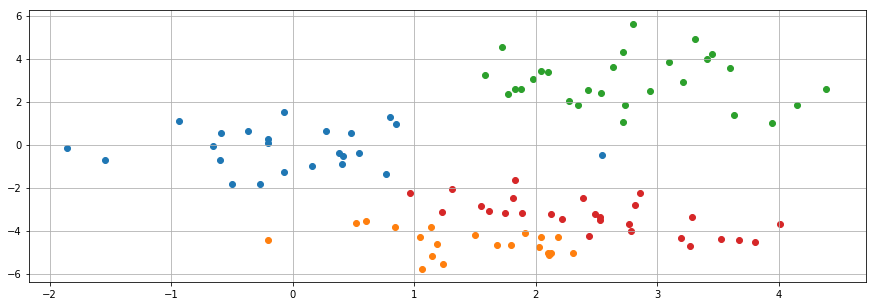

In [26]:
show_cluster(points,4)

number of iterations: 8


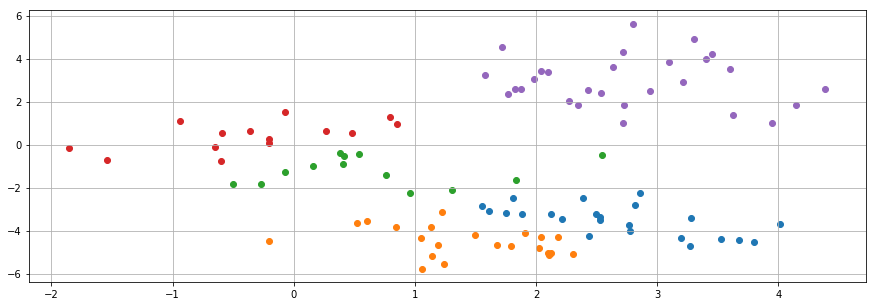

In [27]:
show_cluster(points,5)